In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("doctorfees_train.csv")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df.shape

(5961, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

Text(0.5, 1.0, 'Years of Experience-Distplot')

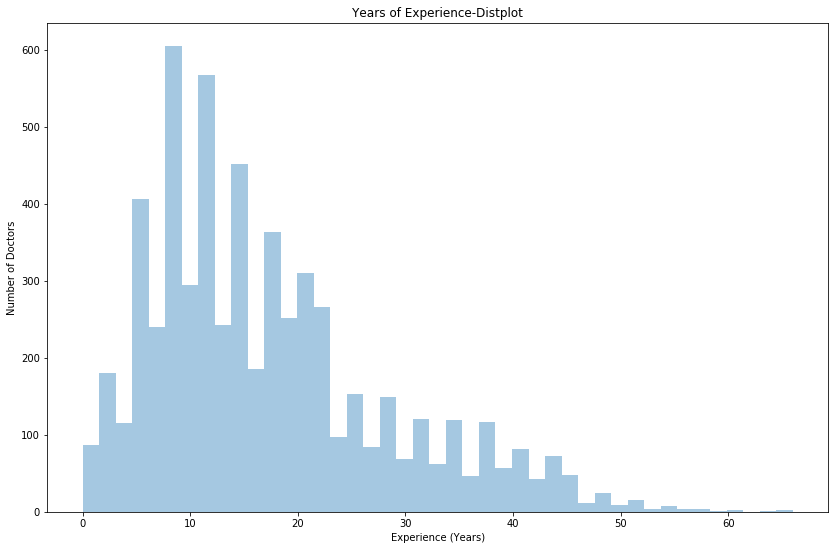

In [6]:
plt.figure(figsize=(14,9))
sns.distplot(df["Experience"],kde=False)
plt.xlabel('Experience (Years)')
plt.ylabel('Number of Doctors')
plt.title('Years of Experience-Distplot')

In [7]:
df['Qualification'].value_counts()

BDS                                                                                                                                                                     488
BHMS                                                                                                                                                                    477
BAMS                                                                                                                                                                    471
MBBS                                                                                                                                                                    334
MBBS, MS - ENT                                                                                                                                                          220
                                                                                                                                            

In [8]:
#cleaning the columns to reduce entries
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [9]:
df['Qualification'] = df['Qualification'].apply(clean_text)

In [10]:
df['Qualification'].value_counts()

bds                                                                             488
bhms                                                                            477
bams                                                                            471
mbbs                                                                            334
mbbs ms ent                                                                     220
                                                                               ... 
mbbs dnb family medicine ccedm ccmtd ccdr                                         1
mbbs md dermatology dvd fellowship in pediatric dermatology                       1
bds mds periodontics fellow of international congress of oral implantologist      1
pg diploma in child health mbbs                                                   1
mbbs md dermatology diploma in venereology diploma in dermatology venerology      1
Name: Qualification, Length: 1420, dtype: int64

In [11]:
df['Place'].value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
West Of Chord Road, Bangalore     1
Siddapura, Bangalore              1
Vaduthala, Ernakulam              1
Lodhi Colony, Delhi               1
Rani Khera, Delhi                 1
Name: Place, Length: 877, dtype: int64

In [12]:
def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [13]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [14]:
df['Place'].fillna('missing', inplace=True)

In [15]:
df['Place'] = df['Place'].apply(clean_place)

In [16]:
df['Place'].value_counts()

hsr layout bangalore            75
andheri west mumbai             70
dwarka delhi                    67
banjara hills hyderabad         64
mulund west mumbai              54
                                ..
sg palya kormangla bangalore     1
sukhdev vihar delhi              1
raj nagar 2 delhi                1
kattupakkam chennai              1
shankar vihar delhi              1
Name: Place, Length: 877, dtype: int64

In [17]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
70%       4
69%       4
57%       3
72%       3
62%       2
63%       2
33%       2
55%       2
64%       2
48%       1
45%       1
47%       1
36%       1
65%       1
40%       1
58%       1
53%       1
7%        1
Name: Rating, dtype: int64

In [18]:
df['Rating'].fillna('0%', inplace=True)

In [19]:
def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

In [20]:
df['Rating'] = df['Rating'].apply(clean_rating)
df['Rating'] = df['Rating'].astype(int)

Text(0.5, 1.0, 'Rating-Distplot')

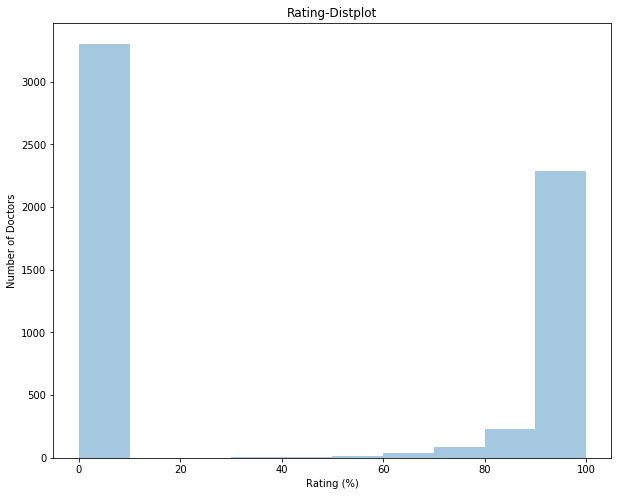

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df["Rating"],kde=False)
plt.xlabel('Rating (%)')
plt.ylabel('Number of Doctors')
plt.title('Rating-Distplot')

In [22]:
df['Miscellaneous_Info'].fillna('missing', inplace=True)

In [23]:
df['Miscellaneous_Info'].value_counts()

missing                                                               2620
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      40
Tooth Extraction Dental Fillings Scaling / Polishing                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                   12
Skin Allergy Treatment Skin Allergies Dermabrasion                       9
                                                                      ... 
4 Feedback Goregaon West, Mumbai ?700                                    1
97% 7 Feedback Vijayanagar, Bangalore                                    1
JP Nagar 5 Phase, Bangalore Free Consultation Visits Today               1
90% 6 Feedback Yelahanka, Bangalore                                      1
Dental Crowns Dental X-Ray Dental prophylaxis                            1
Name: Miscellaneous_Info, Length: 2999, dtype: int64

In [24]:
def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

In [25]:
df['Feedback'] = df['Miscellaneous_Info'].apply(get_feedback)
df['Feedback'] = df['Feedback'].str.replace(' Feedback','')
df['Feedback'] = df['Feedback'].astype(int)

In [26]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
Feedback              0
dtype: int64

Text(0.5, 1.0, 'Feedback-Distplot')

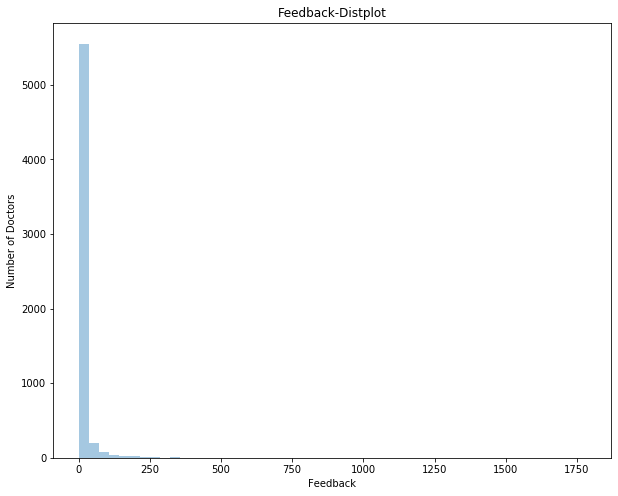

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df["Feedback"],kde=False)
plt.xlabel('Feedback')
plt.ylabel('Number of Doctors')
plt.title('Feedback-Distplot')

In [30]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [31]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)

In [32]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)

In [33]:
df = pd.get_dummies(df, columns=['Profile'])

In [34]:
df.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,100,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,16,0,0,0,0,0,0,1
1,bams md ayurveda medicine,12,98,whitefield bangalore,98 76 feedback whitefield bangalore,350,76,0,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,0,mathikere bel bangalore,missing,300,0,0,0,0,0,1,0,0
3,bsc zoology bams,12,0,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,250,0,0,1,0,0,0,0,0
4,bams,20,100,keelkattalai chennai,100 4 feedback keelkattalai chennai,250,4,0,1,0,0,0,0,0


In [35]:
X = df.drop(labels=['Fees'], axis=1)
y = df['Fees'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [37]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 13), (4470,), (1491, 13), (1491,))

In [38]:
X_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Miscellaneous_Info',
       'Feedback', 'Misc_Fees', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

In [39]:
X_train_qual = X_train['Qualification']
X_cv_qual = X_cv['Qualification']

X_train_place = X_train['Place']
X_cv_place = X_cv['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']

In [40]:
#term frequency - Tf
#InverseDocumentFrequency - IDF
#vectorizerr - TFidVectorize
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_cv_qual = tf1.transform(X_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf3.fit_transform(X_train_misc)
X_cv_misc = tf3.transform(X_cv_misc)

In [41]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)

In [42]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error,r2_score,mean_absolute_error

In [43]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv  = hstack((X_cv_exp, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [44]:
merged_train.shape, merged_cv.shape

((4470, 8600), (1491, 8600))

In [45]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [47]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=91, shuffle=True)

In [49]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(merged_train,y_train)
    print(model)
    pre = model.predict(merged_cv)
    print("\n")
    R2 = r2_score(y_cv,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_cv,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_cv,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  -5.206012293412312


Cross val score =  nan


Mean Squared error
 223258.44450314503


Mean absolute error 
315.1674967977027



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.21138183968274815


Cross val score =  nan


Mean Squared error
 28370.176444261222


Mean absolute error 
127.94226021680122



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.16917923720983952


Cross val score =  nan


Mean Squared error
 29888.3957027193


Mean absolute error 
136.57906088685914



****************

In [50]:
result=pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,-5.206012,NaN,223258.444503,315.167497
1,Ridge,0.211382,NaN,28370.176444,127.942260
2,Lasso,0.169179,NaN,29888.395703,136.579061
3,KNeighborsRegressor,0.063321,NaN,33696.584628,143.074715
4,SVR,-0.000073,NaN,35977.184742,148.851299
5,DecisionTreeRegressor,-0.319289,NaN,47460.815560,150.733736
6,RandomForestRegressor,0.233957,NaN,27558.050414,124.435594
7,AdaBoostRegressor,0.100509,NaN,32358.773116,148.918869
8,GradientBoostingRegressor,0.215169,NaN,28233.936560,132.169087


In [51]:
from sklearn.externals import joblib
joblib.dump(RFC,'Doctor_Fees.pkl')

['Doctor_Fees.pkl']

In [53]:
df_test = pd.read_csv("doctorfees_test.csv")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [54]:
df_test['Experience'] = df_test['Experience'].str.replace('years experience','').astype(int)

In [55]:
df_test['Qualification'] = df_test['Qualification'].apply(clean_text)
df_test['Place'].fillna('missing', inplace=True)

In [56]:
df_test['Place'] = df_test['Place'].apply(clean_place)

In [57]:
df_test['Rating'].fillna('0%', inplace=True)

In [58]:
df_test['Rating'] = df_test['Rating'].apply(clean_rating)
df_test['Rating'] = df_test['Rating'].astype(int)

In [59]:
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

In [60]:
df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In [62]:
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_misc)

In [63]:
df_test=pd.get_dummies(df_test,  columns=['Profile'])

In [64]:
df_test.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,mbbs,35,0,ghatkopar east mumbai,missing,0,0,0,0,0,0,1,0
1,mbbs diploma in otorhinolaryngology dlo,31,0,west marredpally hyderabad,missing,0,0,0,0,0,1,0,0
2,mbbs ddvl,40,70,kk nagar chennai,70 4 feedback kk nagar chennai,4,0,0,0,1,0,0,0
3,bams,0,0,new ashok nagar delhi,missing,0,0,1,0,0,0,0,0
4,bds mds conservative dentistry endodontics,16,100,kanakpura road bangalore,general dentistry conservative dentistry cosme...,0,0,0,1,0,0,0,0


In [65]:
X_train = df.drop(labels='Fees', axis=1)
y_train = df['Fees'].values
X_test = df_test

In [66]:
X_train_qual = X_train['Qualification']
X_test_qual = X_test['Qualification']

X_train_place = X_train['Place']
X_test_place = X_test['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_test_misc = X_test['Miscellaneous_Info']

In [67]:
tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_test_qual = tf1.transform(X_test_qual)

tf3 = TfidfVectorizer()
X_train_place = tf3.fit_transform(X_train_place)
X_test_place = tf3.transform(X_test_place)

tf4 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf4.fit_transform(X_train_misc)
X_test_misc = tf4.transform(X_test_misc)

In [68]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_test_exp = np.array(X_test['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_test_feedback = np.array(X_test['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_test_rating = np.array(X_test['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
X_train_prof = X_train[cols]
X_test_prof = X_test[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_test_miscfees = np.array(X_test['Misc_Fees']).reshape(-1,1)

In [69]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_test  = hstack((X_test_exp, X_test_qual, X_test_prof, X_test_place, X_test_rating, X_test_misc, X_test_miscfees))

In [70]:
merged_train.shape, merged_test.shape

((5961, 9982), (1987, 9982))

In [71]:
merged_train

<5961x9982 sparse matrix of type '<class 'numpy.float64'>'
	with 105440 stored elements in COOrdinate format>

In [72]:
merged_test

<1987x9982 sparse matrix of type '<class 'numpy.float64'>'
	with 34271 stored elements in COOrdinate format>